In [2]:
%load_ext autoreload
%autoreload 2

import os 
from src.data.data_loader import split_train_val_test_sets
from src.data.meta_sampler import split_batch
import torchvision
from src.data.constants import K_SHOT, N_WAY
import matplotlib.pyplot as plt
import torch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
torch.cuda.is_available()

False

In [2]:
train_data_loader, val_data_loader, test_data_loader = split_train_val_test_sets()

100%|██████████| 169001437/169001437 [00:23<00:00, 7042105.99it/s]


Extracting ../cifar-100-python.tar.gz to ../
Files already downloaded and verified


In [4]:
# plot sample images 
imgs, targets = next(iter(val_data_loader))


In [5]:
imgs.shape, targets.shape

(torch.Size([40, 3, 32, 32]), torch.Size([40]))

In [22]:
support_imgs, query_imgs, support_targets, query_targets = split_batch(imgs, targets)
support_grid = torchvision.utils.make_grid(support_imgs, nrow=K_SHOT, normalize=True)
support_grid = support_grid.permute(1, 2, 0)
query_grid = torchvision.utils.make_grid(query_imgs, nrow=K_SHOT, normalize=True)
query_grid = query_grid.permute(1, 2, 0)


In [23]:
support_targets

tensor([ 3,  3,  3,  3, 56, 56, 56, 56, 38, 38, 38, 38, 97, 97, 97, 97, 25, 25,
        25, 25])

(-0.5, 137.5, 171.5, -0.5)

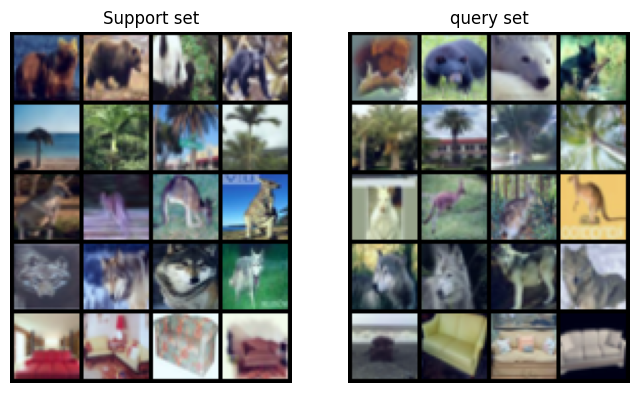

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(8, 5))
ax[0].imshow(support_grid)
ax[0].set_title("Support set")
ax[0].axis('off')
ax[1].imshow(query_grid)
ax[1].set_title("query set")
ax[1].axis('off')

In [ ]:
# Plot test images

In [24]:
imgs, targets = next(iter(test_data_loader))


In [26]:
support_imgs, support_targets = imgs, targets
support_grid = torchvision.utils.make_grid(support_imgs, nrow=K_SHOT, normalize=True)
support_grid = support_grid.permute(1, 2, 0)

(-0.5, 137.5, 171.5, -0.5)

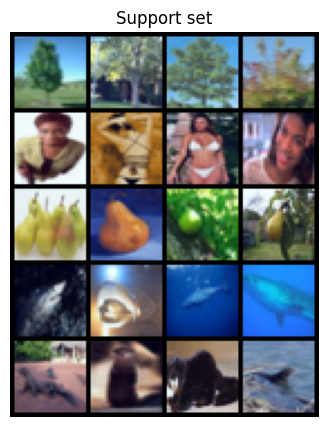

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(4, 5))
ax.imshow(support_grid)
ax.set_title("Support set")
ax.axis('off')

In [28]:
support_targets

tensor([47, 47, 47, 47, 98, 98, 98, 98, 57, 57, 57, 57, 73, 73, 73, 73, 55, 55,
        55, 55])